In [89]:
#엑셀 패키지 설치
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
#필요 패키지 임포트
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [91]:
#데이터 프레임의 필드에서 전처리하는 함수
def deleteChar(df, field):
    df[field] = df[field].str.replace('/','')
    df[field] = df[field].str.replace('^','')
    df[field] = df[field].str.replace('[','')
    df[field] = df[field].str.replace(']','')
    df[field] = df[field].str.replace('=','')
    df[field] = df[field].str.replace('=','')
    df[field] = df[field].str.replace(';','')
    df[field] = df[field].str.replace('-',' ')

    return df


In [92]:
# 엑셀 파일의 경로를 지정
excel_file_path_2017 = "성동구립성수도서관 도서 대출목록 (2017년 05월).xlsx"
excel_file_path_2023 = "성동구립성수도서관 장서 대출목록 (2023년 05월).xlsx"

# 엑셀 파일을 pandas DataFrame으로 읽음
df_2017 = pd.read_excel(excel_file_path_2017)
df_2023 = pd.read_excel(excel_file_path_2023)


c:\Users\13002\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\13002\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [93]:

# 도서명의 기호 제거
df_2017 = deleteChar(df_2017,'도서명')
df_2023 = deleteChar(df_2023,'도서명')


In [94]:
#23년 데이터 확인
df_2023

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,"열다섯, 비밀의 온도",이진미 지음,초록서재,2023,9791192273099,NaN,4,NaN,813.7,1,0,2023-05-31
1,2,결정 거부자,설흔 지음,우리학교,2023,9791167552051,NaN,4,NaN,813.7,1,0,2023-05-31
2,3,풍수전쟁,김진명 지음,이타북스,2023,9791167763846,NaN,0,NaN,813.7,1,0,2023-05-31
3,4,울트라셀프,이리앨 지음,다산북스,2023,9791130655550,NaN,0,NaN,325.211,1,0,2023-05-31
4,5,마녀가 되는 주문,단요 지음,책폴,2023,9791198176561,NaN,4,NaN,813.7,1,0,2023-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64441,64442,(The)jacket I wear in the snow,by Shirley Neitzel;pictures by Nancy Winslow P...,HarperTrophy,1989,9780688045876,NaN,5,NaN,808.9,2,31,2012-08-06
64442,64443,Lots of feelings,[by] Shelley Rotner,MillbrookPress,2003,9780761323778,NaN,5,NaN,808.9,2,44,2012-08-06
64443,64444,Kitten＇s first full moon,by Kevin Henkes,Greenwillow Books,2004,9780060588281,NaN,5,NaN,808.9,1,35,2012-08-06
64444,64445,Little blue and little yellow,by Leo Lionni,HarperCollins,1995,9780688132859,NaN,5,NaN,808.9,2,53,2012-08-06


1. 2017년 5월과 비교하여 2023년 5월 시점에서 추가된 도서의 목록 및 개수

In [95]:
#17년 23년 ISBN기준으로 중복된 도서 데이터 제거

duplicate_df2017 = df_2017.drop_duplicates(['도서명'])
duplicate_df2023 = df_2023.drop_duplicates(['도서명'])

In [96]:
#23년 ISBN값을 17년 값중에 있는지 없는지 판단해서 없는것을 new23_df저장
new23_df = duplicate_df2023[~duplicate_df2023['도서명'].isin(duplicate_df2017['도서명'])]
#23년에 추가된 데이터 확인
print('23.5 과 17.5 비교하여 추가된 도서 개수 : ' + str(len(new23_df)))

23.5 과 17.5 비교하여 추가된 도서 개수 : 36829


2. 2017년 5월과 비교하여 2023년 5월 시점에서 없어진 도서의 목록 및 개수

In [97]:
#17년 ISBN값을 23년 값중에 있는지 없는지 판단해서 없는것을 new17_df
new17_df = duplicate_df2017[~duplicate_df2017['도서명'].isin(duplicate_df2023['도서명'])]
#23년 없어진 데이터 확인
print('23.5 기준 17.5에 없어진 도서 개수 : ' + str(len(new17_df)))

23.5 기준 17.5에 없어진 도서 개수 : 22960


In [105]:
#17년, 23년 도서명기준으로 중복된 도서 데이터 제거
duplicate_df2017 = df_2017.drop_duplicates(['도서명'])
duplicate_df2023 = df_2023.drop_duplicates(['도서명'])

#도서명 그룹으로 묶어 대출건수를 합해서 책의 총 대출건수를 계산
df_2017_sum = df_2017.groupby('도서명').sum()['대출건수'].sort_values(ascending=False)
df_2023_sum = df_2023.groupby('도서명').sum()['대출건수'].sort_values(ascending=False)

#중복제거된 데이터프레임에 합산된 대출건수 추가
duplicate_df2017_sum = pd.merge(duplicate_df2017, df_2017_sum, on='도서명')
duplicate_df2023_sum = pd.merge(duplicate_df2023, df_2023_sum, on='도서명')

#대출건수로 정렬
duplicate_df2017_sum = duplicate_df2017_sum.sort_values(by='대출건수_y',ascending=False)
duplicate_df2023_sum = duplicate_df2023_sum.sort_values(by='대출건수_y',ascending=False)

#필요없는 필드 제거
duplicate_df2017_sum = duplicate_df2017_sum.drop(['대출건수_x','관리번호','저자','출판사','세트 ISBN','부가기호','권','주제분류번호','도서권수','등록일자'], axis=1)
duplicate_df2023_sum = duplicate_df2023_sum.drop(['대출건수_x','번호','저자','출판사','세트 ISBN','부가기호','권','주제분류번호','도서권수','등록일자'], axis=1)

#명확한 데이터 조회를 위해 컬럼명 변경
duplicate_df2017_sum = duplicate_df2017_sum.rename(columns={'발행년도':'17년 발행년도'})
duplicate_df2017_sum = duplicate_df2017_sum.rename(columns={'대출건수_y':'17년 대출건수'})

duplicate_df2023_sum = duplicate_df2023_sum.rename(columns={'발행년도':'23년 발행년도'})
duplicate_df2023_sum = duplicate_df2023_sum.rename(columns={'대출건수_y':'23년 대출건수'})


3. 2017년 5월과 2023년 5월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교

In [118]:

#대출건수가 많은 순서대로 상위 20개를 뽑아 데이터프레임에 저장
duplicate_df2017_sum20 = duplicate_df2017_sum.head(20)
duplicate_df2023_sum20 = duplicate_df2023_sum.head(20)

#데이터에서 대출건수 많은 순서대로 순위 지정후 데이터프레임에 추가
duplicate_df2017_sum20['rank'] = duplicate_df2017_sum20['17년 대출건수'].rank(ascending=False)
duplicate_df2023_sum20['rank'] = duplicate_df2023_sum20['23년 대출건수'].rank(ascending=False)

#순위를 인덱스로 지정
duplicate_df2017_sum20.set_index(['rank'], inplace=True)
duplicate_df2023_sum20.set_index(['rank'], inplace=True)

#17년, 23년 데이터프레임을 compare_df에 합쳐서 한번에 출력
#같은 행에 17년과 23년을 동시에 나타내고 싶은데 하지 못함
compare_df = pd.concat([duplicate_df2017_sum20, duplicate_df2023_sum20])
compare_df.reset_index(drop = True)
#한셀에 17년과 20년을 같이 붙여서 보여주고 싶었는데 잘되지 않음
compare_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25748\3403114911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df2017_sum20['rank'] = duplicate_df2017_sum20['17년 대출건수'].rank(ascending=False)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25748\3403114911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df2023_sum20['rank'] = duplicate_df2023_sum20['23년 대출건수'].rank(ascending=False)


,도서명,17년 발행년도,ISBN,17년 대출건수,yyyy,23년 발행년도,23년 대출건수
rank,,,,,,,
1.0,황태자비 납치사건,2011,9788993964134,1596.0,2017,NaN,NaN
2.0,"식객, 팔도를 간다. 경기편 2",2012,9788934941958,1590.0,2017,NaN,NaN
3.0,유대인 하브루타 경제교육 꼬마 버핏은 어떻게 경제를 공부했을까,2014,9791155421017,1506.0,2017,NaN,NaN
4.0,퀴르발 남작의 성 :최제훈 소설집,2010,9788932020525,1499.0,2017,NaN,NaN
5.0,(절대 배신하지 않는)돈의 습관 Absolute savings,2013,9791185020013,1487.0,2017,NaN,NaN
6.0,호두까기 인형,2016,8809270747057,264.0,2017,NaN,NaN
7.0,난 토마토 절대 안 먹어,2001,9788911020003,192.0,2017,NaN,NaN
8.0,해리포터와 불사조 기사단,2012,9788983921451,183.0,2017,NaN,NaN
9.0,백설 공주,2015,9788915097520,178.0,2017,NaN,NaN


4. 2017년 5월과 2023년 5월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수 (100권이 적당하지 않으면 숫자를 조정 가능)

In [113]:
#대출건수가 많은 순서대로 상위 20개를 뽑아 데이터프레임에 저장
duplicate_df2017_sum100 = duplicate_df2017_sum.head(100)
duplicate_df2023_sum100 = duplicate_df2023_sum.head(100)

#ISBN이 같은것을 합쳐서 merged_df 데이터프레임에 저장
merged_df = pd.merge(duplicate_df2017_sum100, duplicate_df2023_sum100, on='도서명', how='inner')
#데이터 확인
merged_df

,도서명,17년 발행년도,ISBN_x,17년 대출건수,23년 발행년도,ISBN_y,23년 대출건수
0,호두까기 인형,2016,8809270747057,264,2012,9788967490539,247
1,해리포터와 불사조 기사단,2012,9788983921451,183,2012,9788983921475,369
2,보물섬,2010,9788954839716,143,2015,9788955473414,255
3,도서관 생쥐,2011,9788995981276,132,2014,9788965590910,240
4,구름빵,2011,9788953582767,117,2004,9791170283836,402
5,틀려도 괜찮아,2010,9788990611260,114,2010,9788990611260,232
6,키다리 아저씨,2010,9788954839631,111,2019,9791164450091,236


In [114]:
#상위100권을 했을때 동일한 도서는 6권이어서 300건으로 늘려봤음
#대출건수가 많은 순서대로 상위 20개를 뽑아 데이터프레임에 저장
duplicate_df2017_sum300 = duplicate_df2017_sum.head(300)
duplicate_df2023_sum300 = duplicate_df2023_sum.head(300)

#ISBN이 같은것을 합쳐서 merged_df 데이터프레임에 저장
merged_df = pd.merge(duplicate_df2017_sum300, duplicate_df2023_sum300, on='도서명', how='inner')
#데이터 확인
merged_df

,도서명,17년 발행년도,ISBN_x,17년 대출건수,23년 발행년도,ISBN_y,23년 대출건수
0,호두까기 인형,2016,8809270747057,264,2012,9788967490539,247
1,해리포터와 불사조 기사단,2012,9788983921451,183,2012,9788983921475,369
2,오즈의 마법사,2015,9788915097520,163,2015,9788915097612,191
3,샬롯의 거미줄,2012,8809462430569,152,2016,9788952781734,201
4,헨젤과 그레텔,2016,9791159480461,151,2015,9788915097674,131
5,지각대장 존,1999,9788949110073,146,2011,9788949110073,149
6,보물섬,2010,9788954839716,143,2015,9788955473414,255
7,고릴라,1998,9788949110488,138,2011,9788949110486,185
8,걸리버 여행기,2013,9788925880563,134,2019,9791187142966,215
9,도서관 생쥐,2011,9788995981276,132,2014,9788965590910,240


5. 2017년 5월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

In [120]:


#17년 상위 50개 대출건수를 duplicate_df2017_sum 데이터프레임에 저장
duplicate_df2017_sum50 = duplicate_df2017_sum.head(50)

#데이터프레임 병합시 타입오류 발생으로 ISBN타입을 string으로 변경
#duplicate_df2017_sum['ISBN'] = duplicate_df2017_sum['ISBN'].astype('string')
#duplicate_df2023_sum['ISBN'] = duplicate_df2023_sum['ISBN'].astype('string')
#각 행에 기준 연도 데이터 추가
duplicate_df2017_sum['yyyy'] = '2017'
duplicate_df2023_sum['yyyy'] = '2023'

#17년, 23년 데이터프레임을 합치고 대출건수 변화된 데이터를 merged_df데이터프레임에 추가
merged_df = pd.merge(duplicate_df2017_sum50, duplicate_df2023_sum, on='도서명', how='left')
merged_df['change_count'] = merged_df['17년 대출건수'] - merged_df['23년 대출건수']
#데이터확인
merged_df



,도서명,17년 발행년도,ISBN_x,17년 대출건수,yyyy_x,23년 발행년도,ISBN_y,23년 대출건수,yyyy_y,change_count
0,황태자비 납치사건,2011,9788993964134,1596,2017,NaN,NaN,NaN,NaN,NaN
1,"식객, 팔도를 간다. 경기편 2",2012,9788934941958,1590,2017,NaN,NaN,NaN,NaN,NaN
2,유대인 하브루타 경제교육 꼬마 버핏은 어떻게 경제를 공부했을까,2014,9791155421017,1506,2017,NaN,NaN,NaN,NaN,NaN
3,퀴르발 남작의 성 :최제훈 소설집,2010,9788932020525,1499,2017,NaN,NaN,NaN,NaN,NaN
4,(절대 배신하지 않는)돈의 습관 Absolute savings,2013,9791185020013,1487,2017,NaN,NaN,NaN,NaN,NaN
5,호두까기 인형,2016,8809270747057,264,2017,2012,9788967490539,247.0,2023,17.0
6,난 토마토 절대 안 먹어,2001,9788911020003,192,2017,2013,9788911020003,102.0,2023,90.0
7,해리포터와 불사조 기사단,2012,9788983921451,183,2017,2012,9788983921475,369.0,2023,-186.0
8,백설 공주,2015,9788915097520,178,2017,2015,9788915097568,56.0,2023,122.0
9,인어공주,2016,9791159480416,177,2017,2015,9788915097599,44.0,2023,133.0


C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53300 (\N{HANGUL SYLLABLE KWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG})

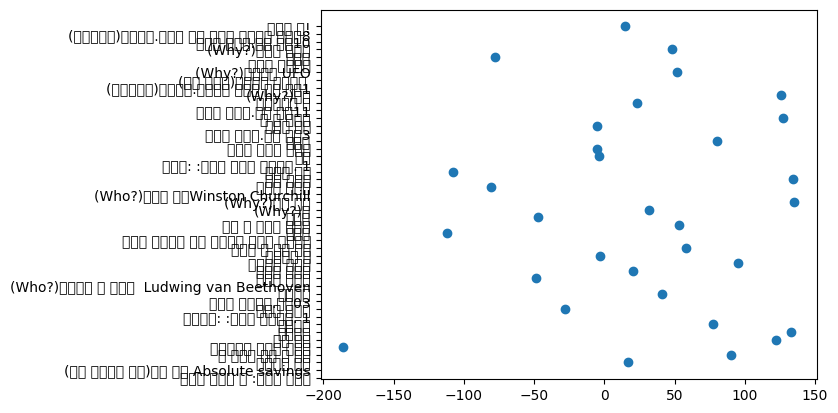

In [121]:
#도서대출 증가수를 그래프로 표현
#도서명 텍스트가 인코딩오류가 나는데, 타입을 string으로 지정해도 나옴. 오류 해결 못함
plt.scatter(merged_df['change_count'], merged_df['도서명'])
plt.show()


7. 위의 통계 외에도 2017년과 2023년을 비교하기에 유의미하다고 여겨지는 분석을 각자 수행하고 그 결과물을 그래프로 표현. 결과에 대한 분석을 코드에 추가 (텍스트, 주석 등)


C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB})

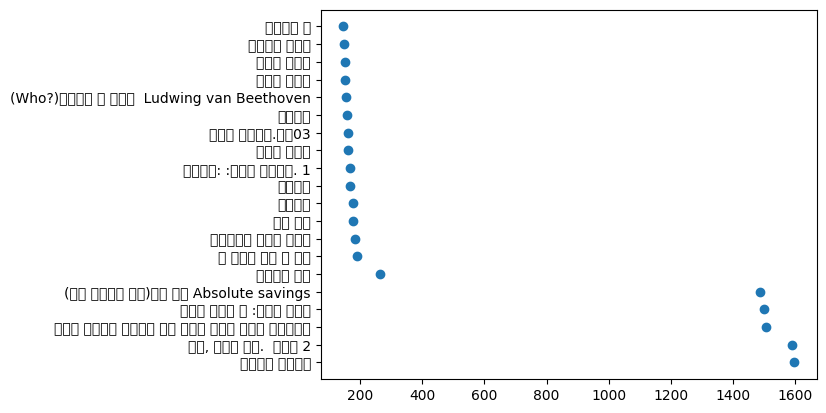

In [123]:
#17년 대출건수 상위20개에 대한 도서별 대출건수 그래프 출력
plt.scatter(duplicate_df2017_sum20['17년 대출건수'], duplicate_df2017_sum20['도서명'])
plt.show()

C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13002\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) m

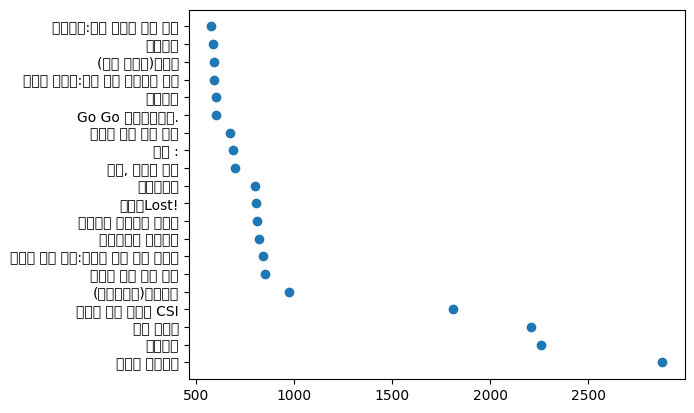

In [125]:
#23년 대출건수 상위20개에 대한 도서별 대출건수 그래프 출력
plt.scatter(duplicate_df2023_sum20['23년 대출건수'], duplicate_df2023_sum20['도서명'])
plt.show()